In [1]:
import wave
import numpy as np

In [2]:
file = wave.open('file3.wav','r')
signal = file.readframes(-1)
sound_wave = np.frombuffer(signal,dtype='int16')
frame_rate = file.getframerate()
time_stamp = np.linspace(start=0,stop=len(sound_wave)/frame_rate,num=len(sound_wave))
# Give a Title
plt.title('First Graph')

# Label the x's and y's
plt.ylabel('Amplitude')
plt.xlabel('Time(seconds)')

# Plot it
plt.plot(time_stamp,sound_wave,label='First Data')

plt.legend()
plt.show()

In [3]:
signal = file.readframes(-1)
signal[:10] # This is in byte form

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

### We should convert byte to int

In [4]:
sound_wave = np.frombuffer(signal,dtype='int16')
sound_wave

array([   0,    0,    0, ..., 1448, 9640, 2742], dtype=int16)

### To find the Frequency of the Audio File

In [5]:
frame_rate = file.getframerate() # In KHz

### To find the Sound wave Time Stamps

In [6]:
time_stamp = np.linspace(start=0,
                      stop=len(sound_wave)/frame_rate,
                      num=len(sound_wave))

In [7]:
time_stamp

array([0.00000000e+00, 2.26757421e-05, 4.53514842e-05, ...,
       1.00362404e+02, 1.00362426e+02, 1.00362449e+02])

### Data Visualization in Sound waves

In [8]:
import matplotlib.pyplot as plt

/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


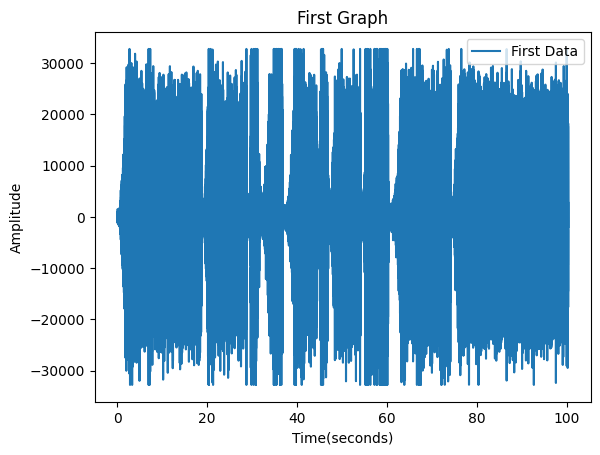

In [9]:
# Give a Title
plt.title('First Graph')

# Label the x's and y's
plt.ylabel('Amplitude')
plt.xlabel('Time(seconds)')

# Plot it
plt.plot(time_stamp,sound_wave,label='First Data')

plt.legend()
plt.show()

In [10]:
sound_wave   # --> This is The Data we need to preprocess or model it 

array([   0,    0,    0, ..., 1448, 9640, 2742], dtype=int16)

### Setting up the Google Speech Recognizer

In [11]:
import speech_recognition as sr

In [12]:
# Create an Instance
recognizer = sr.Recognizer()

# Setting up energy threshold but its automatic nowadays
recognizer.energy_threshold = 300

### Creating the audiodata

In [13]:
audio_ex = sr.AudioFile('file1.wav')
with audio_ex as source:
    recognizer.adjust_for_ambient_noise(source,duration=0.5)
    audiodata = recognizer.record(audio_ex) # offset and duration

In [16]:
# for i, speaker in enumerate(speakers):
#     with speaker as source:
#         speaker_audio = recognizer.record(source)
#     print(f"Text from speaker {i}:")
#     print(recognizer.recognize_google(audio_data=speaker_audio,
#          				  language="en-US"))

## USING PyDUB

In [17]:
from pydub import AudioSegment

In [18]:
# Import an wav file
file = AudioSegment.from_file(file='file1.wav',format='wav')

### To play an audio file

In [19]:
from pydub.playback import play

### Audio Parameters 

In [20]:
# To get the framerate
file.frame_rate

# To get the channels 0-> mono, 1-> stereo
file.channels

# To get the sample width 
file.sample_width

# To get the maximum sound(amplitude) in the file
file.max

# To get the no.of.ms in a sound file
len(file)

4357

### To change the Audio Parameters

In [21]:
file.set_frame_rate(40000)

## Manipulating Audio Files

In [22]:
file.split_to_mono()

In [23]:
from pydub.effects import normalize

In [24]:
normalize(file)

## Converting and changing AudioFiles (EDA)

In [25]:
import os

In [26]:
folder = ['file1.wav','file2.wav']
# Loop through the files in the folder
for audio_file in folder:
    print(audio_file)
	# Create the new .wav filename
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
        
    # Read audio_file and export it in wav format
    AudioSegment.from_file(file=audio_file).export(out_f=wav_filename, 
                                      format='wav')
    
    print(f"Creating {wav_filename}...")

file1.wav
Creating file1.wav...
file2.wav
Creating file2.wav...


In [27]:
for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10
    
    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format='wav')
    print(f"Creating {wav_filename}...")

Creating file1.wav...
Creating file2.wav...


In [28]:
# Create function to convert audio file to wav
def convert_to_wav(filename):
  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(filename)
  
  # Create new filename
  new_filename = filename.split(".")[0] + ".wav"
  
  # Export file as .wav
  audio.export(new_filename, format='wav')
  print(f"Converting {filename} to {new_filename}...")
 
# Test the function
convert_to_wav('file1.wav')

Converting file1.wav to file1.wav...


In [29]:
def show_pydub_statsx(filename):
    
      audio_segment = AudioSegment.from_file(file=filename)
      print(f"Channels: {audio_segment.channels}")
      print(f"Sample width: {audio_segment.sample_width}")
      print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
      print(f"Frame width: {audio_segment.frame_width}")
      print(f"Length (ms): {len(audio_segment)}")
      return audio_segment;

# Try the function
call_1_audio_segment = show_pydub_statsx('file1.wav')

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 1357


### Noise Reduction

In [30]:
(AudioSegment.from_file(file='file3.wav',format='wav')[:5000]+AudioSegment.from_file(file='file3.wav',format='wav')[11000:12000]).export('noise.wav',format='wav')

<_io.BufferedRandom name='noise.wav'>

In [109]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# fs = 200 # sample rate in Hz
# tau = 10 # time window in seconds for mean computation

# # Boxcar/SMA filter params
# N = int(tau*fs) # Number of samples corresponding to tau
# h_boxcar = np.ones(N)/N  # impulse response of boxcar filter

# # EMA filter params
# alpha = np.exp(-1/(fs*tau))
# a_ema = [1, -alpha] # Denominator
# b_ema =  1 - alpha # Numerator

# w, h = signal.freqz(h_boxcar)

# w, h = signal.freqz(b_ema, a_ema)


In [32]:

fs = 200 # sample rate in Hz
tau = 10 # time window in seconds for mean computation

# Boxcar/SMA filter params
N = int(tau*fs) # Number of samples corresponding to tau
h_boxcar = np.ones(N)/N  # impulse response of boxcar filter

# EMA filter params
alpha = np.exp(-1/(fs*tau))
a_ema = [1, -alpha] # Denominator
b_ema =  1 - alpha # Numerator

w, h = signal.freqz(h_boxcar)

w, h = signal.freqz(b_ema, a_ema)

# Using scipy's stft/istft function; see scipy's stft source code for details
def audio_to_frames(y: np.array, m, hop_size, fs) -> np.array:
    """Convert y[n] into a matrix of frames Y_m(w) where each row is a time slice"""   
    _, _, Zxx = signal.stft(y, fs=fs, nperseg=m, noverlap=hop_size, nfft=m*8)
    return Zxx.T

def frames_to_audio(Y: np.array, m, hop_size, fs) -> np.array:
    """Convert Y_m(w) matrix of frames into a 1D signal y[n] using Overlap-Add"""
    _, xrec = signal.istft(Y.T, fs=fs, nperseg=m, noverlap=hop_size, nfft=m*8)
    return xrec

def spec_oversubtract(Y, est_Pn):
    # Compute the alpha values for each frame
    snr = 10*np.log10(sum(abs(Y)**2)/sum(est_Pn))
    alpha = []
    for gamma in snr:  # Implement the purple curve above
        if gamma >= -5 and gamma <= 20:
            a = -6.25*gamma/25 + 6
            alpha.append(a)
        elif gamma > 20:
            alpha.append(1)
        else:
            alpha.append(7.25)
    beta = 0.002
    est_powX = np.maximum(abs(Y)**2 - alpha * est_Pn, beta * est_Pn) # Oversubtraction & spectral flooring
    est_phaseX = np.angle(Y)
    est_Sx = np.sqrt(est_powX) * np.exp(1j*est_phaseX)
    return est_Sx
def noise_estimation_snr(Y: np.array) -> (np.array, np.array):
    """Estimates the magnitude and power spectrum of the noise for each frame"""
    
    # Prepare the output variables
    est_Mn = np.zeros(Y.shape)
    est_Pn = np.zeros(Y.shape)
    
    N = 10 # Number of frames to use for estimating a-posteriori SNR
    
    # Iterate through each frame and estimate noise
    for m in range(Y.shape[0]):
        if m < N:
            # Use noisy spectra for first 10 iterations
            est_Mn[m] = abs(Y[m])
            est_Pn[m] = est_Mn[m] ** 2
        else:
            a = 25
            # A-posteriori SNR            
            gammak = (abs(Y[m])**2)/np.mean(abs(Y[m-N:m])**2, axis=0) 
            alpha = 1/(1+np.exp(-a*(gammak-1.5)))
            est_Mn[m] = alpha * abs(est_Mn[m-1]) + (1-alpha) * abs(Y[m])
            est_Pn[m] = alpha * (abs(est_Mn[m-1])**2) + (1-alpha) * (abs(Y[m])**2)
            
    return est_Mn, est_Pn


In [136]:
import librosa 
%matplotlib inline
import soundfile as sf

speech_file = "stereo_file1.wav"
noise_file = "noise2.wav"


x, fs = librosa.load(speech_file, sr=16000)
n, fs_noise = librosa.load(noise_file, sr=16000)

noise_gain = 0.7
n = noise_gain * n[:len(x)]

# Padding 
for i in range(len(x)):
    if(i>=len(n)):
        n = np.append(n, [0])

y = x + n

# Compute the SNR for signal x to noise n
y_snr = 10*np.log10(np.sum(x**2)/np.sum(n**2))
print("SNR: {:.2f}dB".format(y_snr))
win_t = 30e-3 # window size in seconds
win_s = round(fs*win_t) # window size in samples
hop_size = win_s//2
Y = audio_to_frames(y, win_s, hop_size, fs)
est_Mn, est_Pn = noise_estimation_snr(Y)
est_Sx_oversub = spec_oversubtract(Y, est_Pn)
x_hat_oversub = frames_to_audio(est_Sx_oversub, win_s, hop_size, fs)[:len(x)]
sf.write('stereo_file2.wav', x_hat_oversub, fs)
AudioSegment.from_file(file='stereo_file2.wav',format="wav")

SNR: -2.85dB


In [137]:
import pandas as pd
import numpy as np
import speech_recognition as sr
import time
from os import path
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join
from os import walk
from scipy import signal
import wave
import librosa 
import soundfile as sf
import noisereduce as nr 
from scipy.io import wavfile
from pocketsphinx import AudioFile, get_model_path

rate, data = wavfile.read('stereo_file2.wav') 
reduced_noise = nr.reduce_noise(y=data, sr=rate)
sf.write('stereo_file2.wav', reduced_noise , fs)
AudioSegment.from_file(file='stereo_file2.wav',format="wav")

In [131]:
AudioSegment.from_file(file='stereo_file2.wav',format='wav')[12000:]

In [132]:
(AudioSegment.from_file(file='stereo_file2.wav',format='wav')[12000:]+50).export('noise2.wav',format='wav')

<_io.BufferedRandom name='noise2.wav'>

In [133]:
(AudioSegment.from_file(file='stereo_file2.wav',format='wav')+60).export('stereo_file2.wav',format='wav')

<_io.BufferedRandom name='stereo_file2.wav'>

In [ ]:
Audio(x_hat_oversub, rate=fs)
import soundfile as sf
sf.write('stereo_file1.wav', x_hat_oversub, fs)
#librosa.output.write_wav('test2.wav', x_hat_oversub, fs)

In [ ]:
AudioSegment.from_file(file='stereo_file1.wav',format='wav')[:5000].export('noise2.wav',format='wav')

In [ ]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# read ECG data from the WAV file
sampleRate, data = scipy.io.wavfile.read('stereo_file1.wav')
times = np.arange(len(data))/sampleRate

In [ ]:
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)

In [ ]:
type(filteredBandPass)

In [ ]:
import sounddevice as sd
sd.play(data, sampleRate)

In [ ]:
AudioSegment.from_file('stereo_file1.wav')

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:
from datasets import load_dataset, Audio
minds = load_dataset("PolyAI/minds14", name="en-US", split="train[:100]")

In [ ]:
minds = minds.train_test_split(test_size=0.2)

In [ ]:
minds

In [ ]:
minds = minds.remove_columns(["english_transcription", "intent_class", "lang_id"])

In [107]:
# audio_ex = sr.AudioFile('file3.wav')
# import speech_recognition as sr

# recognizer = sr.Recognizer()
# with audio_ex as source:
#     recognizer.adjust_for_ambient_noise(source,duration=0.5)
#     audiodata = recognizer.record(audio_ex)
# text = recognizer.recognize_google(
#    audio_data = audiodata, 
#    language='en-US')

In [43]:
from pocketsphinx import AudioFile
AudioFile(audio_file='stereo_file1.wav')

In [47]:
from pocketsphinx import AudioFile
for phrase in AudioFile("stereo_file1.wav"): 
    print(phrase)


you had a good or go to gore would only get on what and it owned or so and all the court that that like are you a leo and oh no i'm what could or totally cool you eat or two who grew up and


In [59]:
from pydub import AudioSegment
AudioSegment.from_file(file='stereo_file1.wav',format="wav")

In [101]:
import os
from pocketsphinx import AudioFile, get_model_path

model_path = get_model_path()

config = {
    'verbose': False,
    'audio_file': 'file1.wav',
    'hmm': get_model_path('en-in'),
    'lm': get_model_path('en-in.lm.bin'),
    'dict': get_model_path('cmudict-en-in.dict')
}

audio = AudioFile(audio_file='file1.wav')

for phrase in audio:
    print(phrase)

an odd a are you don't fool to come out as on you not like no a you aren't in use


In [60]:
import wave

In [61]:
"alpha 5 alpha 5 sabar karna"

'alpha 5 alpha 5 sabar karna'

In [82]:
from audio2numpy import open_audio
fp = "file2.wav"  # change to the correct path to your file accordingly
signal_audio, sampling_rate = open_audio(fp)
#for i in sound_wave:
 #   if(i>10000 or i<-10000):
        #sound_wave[i]=0

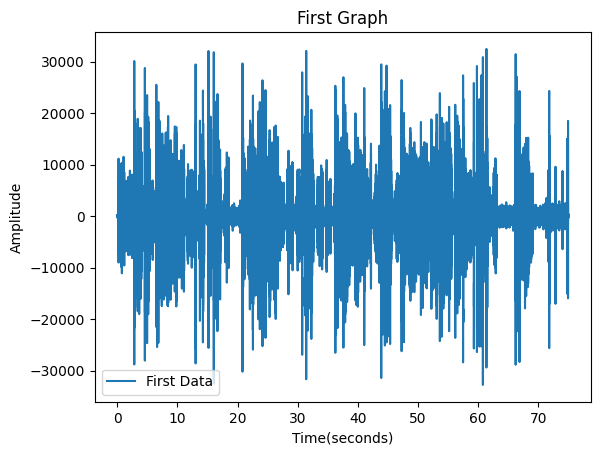

In [87]:
file = wave.open('file2.wav','r')
signal = file.readframes(-1)
sound_wave = np.frombuffer(signal,dtype='int16')
frame_rate = file.getframerate()
time_stamp = np.linspace(start=0,stop=len(sound_wave)/frame_rate,num=len(sound_wave))
# Give a Title
plt.title('First Graph')

# Label the x's and y's
plt.ylabel('Amplitude')
plt.xlabel('Time(seconds)')

# Plot it
plt.plot(time_stamp,sound_wave,label='First Data')

plt.legend()
plt.show()

In [80]:
sound_wave

array([   0,    0,    0, ...,  -19, -257,  241], dtype=int16)

In [85]:
signal_wave = np.frombuffer(signal_audio,dtype='int16')

## DATA PRE-PROCESSING

In [90]:
AudioSegment.from_file(file='file2.wav',format="wav")

In [106]:
file = AudioSegment.from_file(file='file1.wav',format='wav')


16000